<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Application Programming Interface

Estimated time needed: **15** minutes

## Objectives

After completing this lab you will be able to:

*   Create and Use APIs in Python


### Introduction

An API lets two pieces of software talk to each other. Just like a function,  you don’t have to know how the API works only its inputs and outputs.  An essential type of API is a REST API that allows you to access resources via the internet. In this lab, we will review the Pandas Library  in the context of an API, we will also review a basic REST API


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="https://#ref0">Pandas is an API</a></li>
<li><a href="https://#ref1">REST APIs Basics  </a></li>
<li><a href="https://#ref2">Quiz on Tuples</a></li>

</div>

<hr>


In [1]:
!pip install pycoingecko
!pip install plotly
!pip install mplfinance

     |████████████████████████████████| 62 kB 1.2 MB/s  eta 0:00:01


<h2 id="PandasAPI">Pandas is an API </h2>


Pandas is actually set of software components , much of  which is not even written in Python.


In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.offline import plot
import matplotlib.pyplot as plt
import datetime
from pycoingecko import CoinGeckoAPI
from mplfinance.original_flavor import candlestick2_ohlc

You create a dictionary, this is just data.


In [3]:
dict_={'a':[11,21,31],'b':[12,22,32]}

When you create a Pandas object with the Dataframe constructor in API lingo, this is an "instance". The data in the dictionary is passed along to the pandas API. You then use the dataframe to communicate with the API.


In [4]:
df=pd.DataFrame(dict_)
type(df)

pandas.core.frame.DataFrame

<img src = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/images/pandas_api.png" width = 800, align = "center" alt="logistic regression block diagram" />


When you call the method head the dataframe communicates with the API displaying the first few rows of the dataframe.


In [5]:
df.head()

,a,b
0,11,12
1,21,22
2,31,32


When you call the method mean,the API will calculate the mean and return the value.


In [6]:
df.mean()

a    21.0
b    22.0
dtype: float64

<h2 id="ref1">REST APIs</h2>


Rest API’s function by sending a request,  the request is communicated via HTTP message. The HTTP message usually contains a JSON file. This contains instructions for what operation we would like the service or resource to perform. In a similar manner, API returns a response, via an HTTP message, this response is usually contained within a JSON.

In cryptocurrency a popular method to display the movements of the price of a currency.

![Example Candlestick Graph](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/candlestick.png)

Here is a description of the candle sticks.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/explanation.png" alt="Candle Stick Definition" width="800" height="600">

In this lab, we will be using the <a href=https://www.coingecko.com/en/api?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01>CoinGecko API</a> to create one of these candlestick graphs for Bitcoin. We will use the API to get the price data for 30 days with 24 observation per day, 1 per hour. We will find the max, min, open, and close price per day meaning we will have 30 candlesticks and use that to generate the candlestick graph. Although we are using the CoinGecko API we will use a Python client/wrapper for the API called <a href=https://github.com/man-c/pycoingecko?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01>PyCoinGecko</a>. PyCoinGecko will make performing the requests easy and it will deal with the enpoint targeting.


Lets start off by getting the data we need. Using the <code>get_coin_market_chart_by_id(id, vs_currency, days)</code>. <code>id</code> is the name of the coin you want, <code>vs_currency</code> is the currency you want the price in, and <code>days</code> is how many days back from today you want.


In [7]:
cg = CoinGeckoAPI()

bitcoin_data = cg.get_coin_market_chart_by_id(id='bitcoin', vs_currency='usd', days=30)

In [8]:
type(bitcoin_data )

dict

The response we get is in the form of a JSON which includes the price, market caps, and total volumes along with timestamps for each observation. We are focused on the prices so we will select that data.


In [9]:
bitcoin_price_data = bitcoin_data['prices']

bitcoin_price_data[0:5]

[[1631689375938, 47049.65112220391],
 [1631693041932, 47220.812422529794],
 [1631696548445, 47184.03142450308],
 [1631700372205, 47283.06932321387],
 [1631704056661, 47677.21023867665]]

Finally lets turn this data into a Pandas DataFrame.


In [11]:
data = pd.DataFrame(bitcoin_price_data, columns=['TimeStamp', 'Price'])
data

,TimeStamp,Price
0,1631689375938,47049.651122
1,1631693041932,47220.812423
2,1631696548445,47184.031425
3,1631700372205,47283.069323
4,1631704056661,47677.210239
...,...,...
717,1634266902227,59396.003034
718,1634270483575,59643.432753
719,1634274216902,59789.704481
720,1634277880066,59617.654324


Now that we have the DataFrame we will convert the timestamp to datetime and save it as a column called <code>Date</code>. We will map our <code>unix_to_datetime</code> to each timestamp and convert it to a readable datetime.


In [13]:
data['date'] = data['TimeStamp'].apply(lambda d: datetime.date.fromtimestamp(d/1000.0))
data

,TimeStamp,Price,date
0,1631689375938,47049.651122,2021-09-15
1,1631693041932,47220.812423,2021-09-15
2,1631696548445,47184.031425,2021-09-15
3,1631700372205,47283.069323,2021-09-15
4,1631704056661,47677.210239,2021-09-15
...,...,...,...
717,1634266902227,59396.003034,2021-10-15
718,1634270483575,59643.432753,2021-10-15
719,1634274216902,59789.704481,2021-10-15
720,1634277880066,59617.654324,2021-10-15


Using this modified dataset we can now group by the <code>Date</code> and find the min, max, open, and close for the candlesticks.


In [15]:
candlestick_data = data.groupby(data.date, as_index=False).agg({"Price": ['min', 'max', 'first', 'last']})
candlestick_data

date         Price                                          
                         min           max         first          last
0   2021-09-15  47049.651122  48375.017947  47049.651122  48375.017947
1   2021-09-16  47130.724203  48417.353334  48186.532757  47685.493606
2   2021-09-17  47127.660023  48199.636894  47846.036432  47127.660023
3   2021-09-18  47426.418177  48852.869615  47466.298338  48142.162790
4   2021-09-19  47039.261072  48418.448930  48418.448930  47039.261072
5   2021-09-20  43247.995584  47373.601684  47371.039332  43247.995584
6   2021-09-21  40639.952805  43645.260007  43016.738319  40639.952805
7   2021-09-22  40554.383792  43583.393707  40554.383792  43583.393707
8   2021-09-23  43203.165964  45167.713703  43602.016388  45167.713703
9   2021-09-24  41040.874377  45083.064455  44990.297338  43185.540089
10  2021-09-25  42326.797965  42891.645835  42865.024765  42891.645835
11  2021-09-26  40930.065639  43852.795205  42777.716224  43087.021444
12  2021-09-27  42837.083862  44346.563424  43336.861233  43312.489580
13  2021-09-28  41305.539980  42735.865774  42247.355729  41754.661951
14  2021-09-29  41002.934014  42590.876535  41002.934014  41537.908786
15  2021-09-30  41680.501403  44160.400901  41680.501403  43851.272981
16  2021-10-01  43423.916700  48383.330679  43859.326147  48084.326855
17  2021-10-02  47593.596838  48272.451503  48181.876273  48222.551229
18  2021-10-03  47361.100576  49167.261335  47862.633176  48004.647173
19  2021-10-04  47227.376386  49470.207922  48282.971139  49102.760933
20  2021-10-05  49260.232321  51659.401645  49260.232321  51463.767252
21  2021-10-06  50715.567831  55292.025066  51618.141351  55292.025066
22  2021-10-07  53701.377046  55348.365456  55348.365456  54006.700311
23  2021-10-08  53894.595995  55954.432655  53894.595995  54165.900669
24  2021-10-09  54054.173875  55378.278436  54054.173875  55027.353624
25  2021-10-10  54404.435810  56236.920243  55125.460338  54957.562935
26  2021-10-11  54711.869597  57644.525045  54711.869597  57432.423253
27  2021-10-12  55492.821886  57663.165644  57572.510856  56497.000215
28  2021-10-13  54767.161697  57761.236706  56278.202123  57581.791820
29  2021-10-14  57266.128666  58537.185253  57562.115059  57738.817200
30  2021-10-15  57252.346652  59789.704481  57452.431785  59640.413490

Finally we are now ready to use plotly to create our Candlestick Chart.


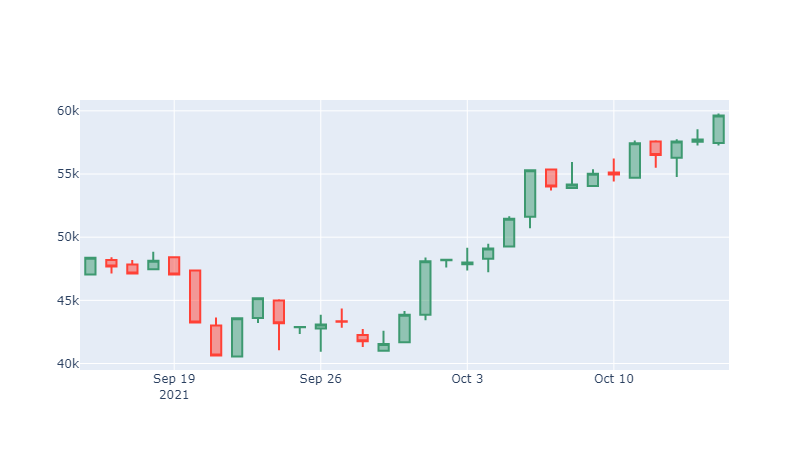

In [17]:
fig = go.Figure(data=[go.Candlestick(x=candlestick_data['date'],
                open=candlestick_data['Price']['first'], 
                high=candlestick_data['Price']['max'],
                low=candlestick_data['Price']['min'], 
                close=candlestick_data['Price']['last'])
                ])

fig.update_layout(xaxis_rangeslider_visible=False)

fig.show()

## Authors:

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                 |
| ----------------- | ------- | ------------- | ---------------------------------- |
| 2020-11-23        | 3.0     | Azim Hirjani  | New API                            |
| 2020-09-09        | 2.1     | Malika Singla | Spell Check                        |
| 2020-08-26        | 2.0     | Lavanya       | Moved lab to course repo in GitLab |
|                   |         |               |                                    |

<hr/>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
